In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=242848854833581b56787f1ca58dd1ad


In [8]:
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | rocha
Processing Record 3 of Set 1 | sept-iles
Processing Record 4 of Set 1 | gunjur
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | fort-shevchenko
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | oropesa
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | havre-saint-pierre
Processing Record 21 of Set 1 | axim
Processing Record 22 of Set 1 | mataura
Process

Processing Record 33 of Set 4 | saint george
Processing Record 34 of Set 4 | hastinapur
Processing Record 35 of Set 4 | kavieng
Processing Record 36 of Set 4 | pochutla
Processing Record 37 of Set 4 | riyadh
Processing Record 38 of Set 4 | vung tau
Processing Record 39 of Set 4 | sabha
Processing Record 40 of Set 4 | esperance
Processing Record 41 of Set 4 | olinda
Processing Record 42 of Set 4 | kongolo
Processing Record 43 of Set 4 | kaeo
Processing Record 44 of Set 4 | tessalit
Processing Record 45 of Set 4 | naryan-mar
Processing Record 46 of Set 4 | chenghai
Processing Record 47 of Set 4 | samarai
Processing Record 48 of Set 4 | mezen
Processing Record 49 of Set 4 | belaya gora
Processing Record 50 of Set 4 | college
Processing Record 1 of Set 5 | miramar
Processing Record 2 of Set 5 | keffi
Processing Record 3 of Set 5 | urdzhar
City not found. Skipping...
Processing Record 4 of Set 5 | malartic
Processing Record 5 of Set 5 | saleaula
City not found. Skipping...
Processing Record

Processing Record 21 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 22 of Set 8 | svetlogorsk
Processing Record 23 of Set 8 | provideniya
Processing Record 24 of Set 8 | luau
Processing Record 25 of Set 8 | cervo
Processing Record 26 of Set 8 | lompoc
Processing Record 27 of Set 8 | caravelas
Processing Record 28 of Set 8 | asau
Processing Record 29 of Set 8 | sikea
City not found. Skipping...
Processing Record 30 of Set 8 | vila velha
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | filadelfia
Processing Record 33 of Set 8 | traverse city
Processing Record 34 of Set 8 | muroto
Processing Record 35 of Set 8 | channel-port aux basques
Processing Record 36 of Set 8 | newport
Processing Record 37 of Set 8 | half moon bay
Processing Record 38 of Set 8 | ulladulla
Processing Record 39 of Set 8 | banda aceh
Processing Record 40 of Set 8 | viedma
Processing Record 41 of Set 8 | vanimo
Processing Record 42 of Set 8 | kulhudhuffushi
Processing Record

City not found. Skipping...
Processing Record 12 of Set 12 | allangigan
City not found. Skipping...
Processing Record 13 of Set 12 | christchurch
Processing Record 14 of Set 12 | bandar-e torkaman
City not found. Skipping...
Processing Record 15 of Set 12 | san joaquin
Processing Record 16 of Set 12 | guanare
Processing Record 17 of Set 12 | micheweni
Processing Record 18 of Set 12 | aosta
Processing Record 19 of Set 12 | itupiranga
Processing Record 20 of Set 12 | mazagao
Processing Record 21 of Set 12 | mercedes
Processing Record 22 of Set 12 | maragogi
Processing Record 23 of Set 12 | prince rupert
Processing Record 24 of Set 12 | tilichiki
Processing Record 25 of Set 12 | ola
Processing Record 26 of Set 12 | aqtobe
Processing Record 27 of Set 12 | stromness
Processing Record 28 of Set 12 | saltpond
Processing Record 29 of Set 12 | lagoa
Processing Record 30 of Set 12 | derzhavinsk
Processing Record 31 of Set 12 | abnub
Processing Record 32 of Set 12 | port-cartier
Processing Record

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,30.31,80,0,5.75,CL,2021-06-15 01:18:27
1,Rocha,-34.4833,-54.3333,53.82,82,100,10.22,UY,2021-06-15 01:14:26
2,Sept-Iles,50.2001,-66.3821,47.05,94,90,7.00,CA,2021-06-15 01:18:27
3,Gunjur,13.2019,-16.7339,78.87,94,40,10.36,GM,2021-06-15 01:18:27
4,Tuktoyaktuk,69.4541,-133.0374,53.60,58,75,11.50,CA,2021-06-15 01:18:28
5,Hithadhoo,-0.6000,73.0833,82.27,75,78,8.08,MV,2021-06-15 01:18:28
6,Fort-Shevchenko,44.5086,50.2630,72.93,81,0,3.02,KZ,2021-06-15 01:18:28
7,Khatanga,71.9667,102.5000,52.56,65,26,8.25,RU,2021-06-15 01:18:29
8,Rikitea,-23.1203,-134.9692,75.06,81,100,12.41,PF,2021-06-15 01:18:29
9,Bilibino,68.0546,166.4372,66.40,33,53,6.13,RU,2021-06-15 01:18:29


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-06-15 01:18:27,-53.1500,-70.9167,30.31,80,0,5.75
1,Rocha,UY,2021-06-15 01:14:26,-34.4833,-54.3333,53.82,82,100,10.22
2,Sept-Iles,CA,2021-06-15 01:18:27,50.2001,-66.3821,47.05,94,90,7.00
3,Gunjur,GM,2021-06-15 01:18:27,13.2019,-16.7339,78.87,94,40,10.36
4,Tuktoyaktuk,CA,2021-06-15 01:18:28,69.4541,-133.0374,53.60,58,75,11.50
...,...,...,...,...,...,...,...,...,...
529,Marion,US,2021-06-15 01:18:15,39.7684,-86.1555,75.54,44,40,11.50
530,Seoul,KR,2021-06-15 01:20:00,37.5683,126.9778,72.91,88,90,4.61
531,Pacific Grove,US,2021-06-15 01:21:28,36.6177,-121.9166,78.75,68,1,7.00
532,Orica,HN,2021-06-15 01:21:29,14.7000,-86.9500,72.25,83,100,1.45


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


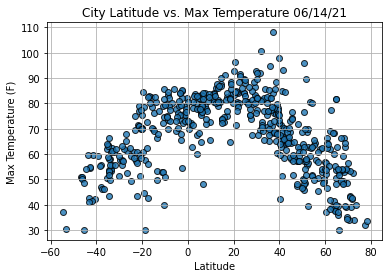

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

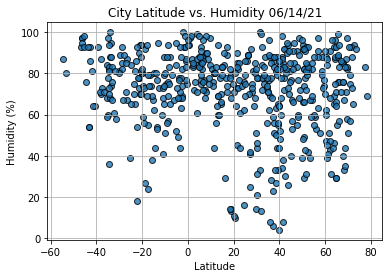

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

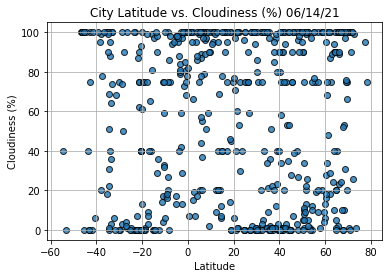

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

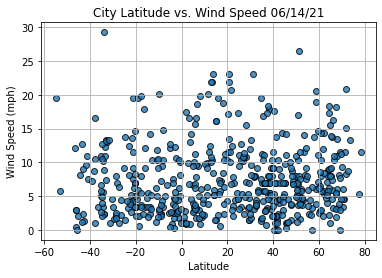

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13


City                    Mahebourg
Country                        MU
Date          2021-06-15 01:18:31
Lat                      -20.4081
Lng                          57.7
Max Temp                    70.25
Humidity                       94
Cloudiness                     40
Wind Speed                   6.91
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Sept-Iles,CA,2021-06-15 01:18:27,50.2001,-66.3821,47.05,94,90,7.00
3,Gunjur,GM,2021-06-15 01:18:27,13.2019,-16.7339,78.87,94,40,10.36
4,Tuktoyaktuk,CA,2021-06-15 01:18:28,69.4541,-133.0374,53.60,58,75,11.50
6,Fort-Shevchenko,KZ,2021-06-15 01:18:28,44.5086,50.2630,72.93,81,0,3.02
7,Khatanga,RU,2021-06-15 01:18:29,71.9667,102.5000,52.56,65,26,8.25


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

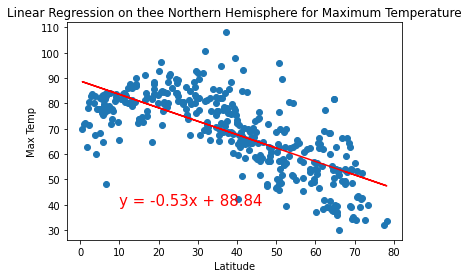

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title(f"Linear Regression on thee Northern Hemisphere for Maximum Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))



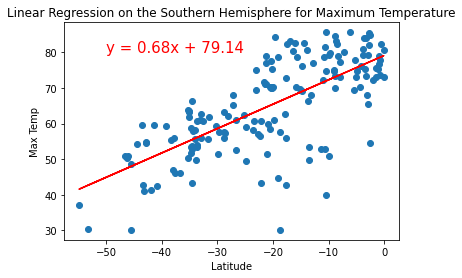

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for Maximum Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

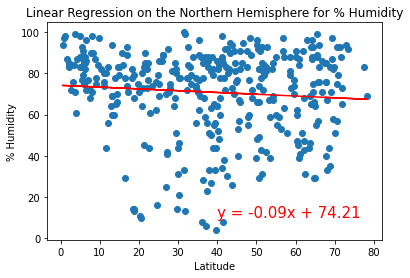

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.title(f"Linear Regression on the Northern Hemisphere for % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

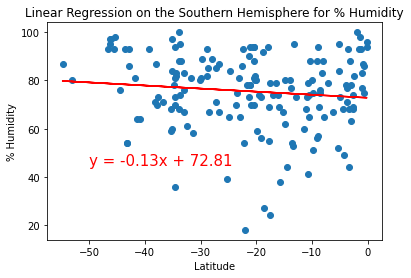

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,45))

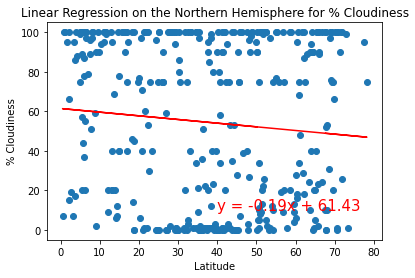

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.title(f"Linear Regression on the Northern Hemisphere for % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

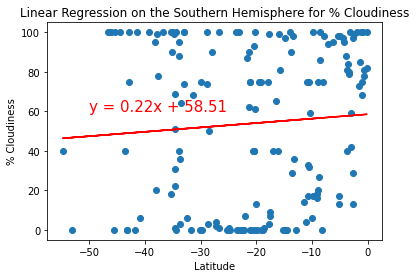

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

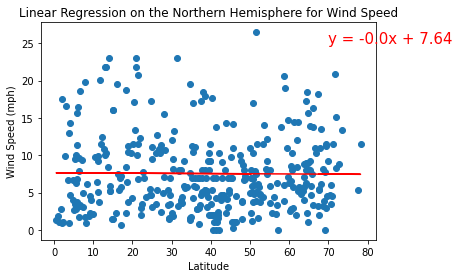

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.title(f"Linear Regression on the Northern Hemisphere for Wind Speed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(70,25))

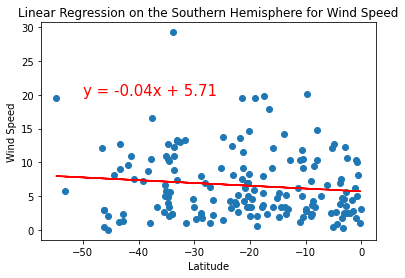

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.title(f"Linear Regression on the Southern Hemisphere for Wind Speed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))
